In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\ASUS\Desktop\MINI_project\Data_p\preprocessed.csv")

In [4]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Date_month
0,30,13.4,22.9,0.6,6.2,3.3,4.0,44.0,5.0,3.0,...,1007.7,1007.1,8.0,5.0,16.9,21.8,False,0.0,False,12
1,30,7.4,25.1,0.0,0.4,6.1,2.0,44.0,0.0,6.0,...,1010.6,1007.8,5.0,1.0,17.2,24.3,False,0.0,False,12
2,30,12.9,25.7,0.0,5.8,9.7,5.0,46.0,5.0,6.0,...,1007.6,1008.7,1.0,2.0,21.0,23.2,False,0.0,False,12
3,30,9.2,28.0,0.0,1.4,12.2,11.0,24.0,13.0,14.0,...,1017.6,1012.8,7.0,7.0,18.1,26.5,False,1.0,False,12
4,30,17.5,32.3,1.0,6.6,1.0,4.0,41.0,12.0,0.0,...,1010.8,1006.0,7.0,8.0,17.8,29.7,False,0.2,False,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,49,3.5,21.8,0.0,14.6,6.6,15.0,31.0,14.0,14.0,...,1024.7,1021.2,7.0,7.0,9.4,20.9,False,0.0,False,6
142189,49,2.8,23.4,0.0,1.0,11.4,15.0,31.0,13.0,13.0,...,1024.6,1020.3,1.0,8.0,10.1,22.4,False,0.0,False,6
142190,49,3.6,25.3,0.0,6.7,2.4,0.0,22.0,13.0,2.0,...,1023.5,1019.1,7.0,0.0,10.9,24.5,False,0.0,False,6
142191,49,5.4,26.9,0.0,5.6,0.0,3.0,37.0,13.0,3.0,...,1021.0,1016.8,0.0,8.0,12.5,26.1,False,0.0,False,6


In [5]:
X = df.drop('RainTomorrow', axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [6]:
from sklearn.decomposition import PCA
explained_varience = []

for n in range(1, 22):
    pca = PCA(n_components=n)
    pca.fit(scaled_X)

    explained_varience.append(np.sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'Varience Explained')

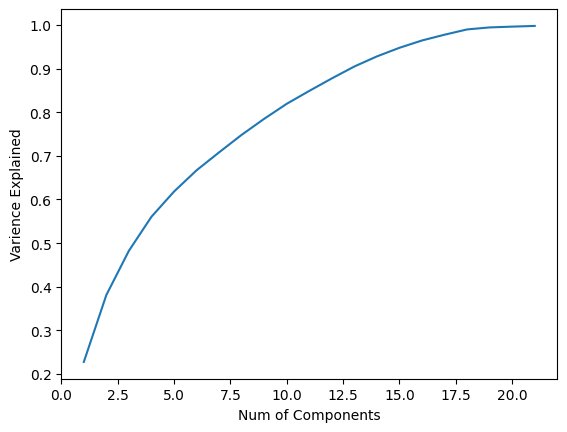

In [7]:

plt.plot(range(1, 22), explained_varience)
plt.xlabel('Num of Components')
plt.ylabel('Varience Explained')

In [8]:
pca = PCA(n_components=13)

In [9]:
pca_result = pca.fit_transform(scaled_X)

In [10]:
np.sum(pca.explained_variance_ratio_)

0.904756133445425

We are keeping 92.33% varience by reducing the dimention to 13

In [11]:
pca_result

array([[ 0.58381882, -1.61805518, -1.88523038, ..., -0.18616646,
        -1.01956246,  0.31217234],
       [ 0.73989661,  0.17723761, -2.67652841, ..., -0.10432922,
        -1.2426766 , -0.83966404],
       [ 2.30023671, -0.25350496, -2.5180723 , ..., -0.38499172,
         0.06667063, -0.13149387],
       ...,
       [-0.17276533,  2.54360768, -1.24206076, ..., -0.390062  ,
        -1.99883661,  2.16010305],
       [ 0.29939785,  1.82708617, -1.00315445, ..., -1.33862845,
         1.48651545,  1.32181326],
       [ 1.02458371,  2.21143956, -0.19924891, ..., -1.6969452 ,
        -0.76342448,  1.30797336]])

In [12]:
index = []

for i in range(1, 14):
    index.append(f'PC{i}')


In [13]:
new_df = pd.DataFrame(pca_result, columns=index)
new_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,0.583819,-1.618055,-1.885230,-0.524610,-0.611141,1.633334,0.865137,-0.716236,-0.653226,-0.292945,-0.186166,-1.019562,0.312172
1,0.739897,0.177238,-2.676528,-1.346488,0.199700,0.302010,1.178170,-0.427962,-0.576035,-1.995690,-0.104329,-1.242677,-0.839664
2,2.300237,-0.253505,-2.518072,0.386727,0.544086,0.005971,1.487277,-0.005286,-0.298946,-0.778130,-0.384992,0.066671,-0.131494
3,1.295330,2.015445,0.765513,0.067151,-0.216299,1.644755,1.712481,-0.770751,-0.836638,-1.090625,1.952643,0.543406,0.056322
4,1.131531,-1.662429,-0.319858,-1.859251,-0.603039,2.171254,0.800810,-1.215048,-0.303299,-0.497884,-0.075745,-0.180692,1.090221
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0.172983,2.682694,1.067177,1.590910,-0.672708,2.997160,0.023907,0.581003,-0.081656,2.452748,-0.424890,-0.127280,0.030336
142189,-0.014699,3.341511,0.549257,1.283646,0.317235,1.865607,-0.241085,0.909668,-0.611085,-1.002966,1.007988,1.906973,-0.636156
142190,-0.172765,2.543608,-1.242061,-1.087295,0.235537,2.159051,-0.999342,0.081804,0.467429,-0.233101,-0.390062,-1.998837,2.160103
142191,0.299398,1.827086,-1.003154,-1.016206,-0.357981,2.654161,-0.898559,0.406884,0.409239,-0.930004,-1.338628,1.486515,1.321813


In [14]:
new_df['RainTomorrow'] = df['RainTomorrow']

In [15]:
new_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,RainTomorrow
0,0.583819,-1.618055,-1.885230,-0.524610,-0.611141,1.633334,0.865137,-0.716236,-0.653226,-0.292945,-0.186166,-1.019562,0.312172,False
1,0.739897,0.177238,-2.676528,-1.346488,0.199700,0.302010,1.178170,-0.427962,-0.576035,-1.995690,-0.104329,-1.242677,-0.839664,False
2,2.300237,-0.253505,-2.518072,0.386727,0.544086,0.005971,1.487277,-0.005286,-0.298946,-0.778130,-0.384992,0.066671,-0.131494,False
3,1.295330,2.015445,0.765513,0.067151,-0.216299,1.644755,1.712481,-0.770751,-0.836638,-1.090625,1.952643,0.543406,0.056322,False
4,1.131531,-1.662429,-0.319858,-1.859251,-0.603039,2.171254,0.800810,-1.215048,-0.303299,-0.497884,-0.075745,-0.180692,1.090221,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0.172983,2.682694,1.067177,1.590910,-0.672708,2.997160,0.023907,0.581003,-0.081656,2.452748,-0.424890,-0.127280,0.030336,False
142189,-0.014699,3.341511,0.549257,1.283646,0.317235,1.865607,-0.241085,0.909668,-0.611085,-1.002966,1.007988,1.906973,-0.636156,False
142190,-0.172765,2.543608,-1.242061,-1.087295,0.235537,2.159051,-0.999342,0.081804,0.467429,-0.233101,-0.390062,-1.998837,2.160103,False
142191,0.299398,1.827086,-1.003154,-1.016206,-0.357981,2.654161,-0.898559,0.406884,0.409239,-0.930004,-1.338628,1.486515,1.321813,False


In [20]:
new_df.to_csv(r"C:\Users\ASUS\Desktop\MINI_project\Data_p\reduced_dataset.csv", index=False)
